# Diffraction on five knife-edges

In [1]:
import os
os.chdir('../../')
from rwp.kediffraction import *
from rwp.antennas import *
from rwp.environment import *
from rwp.vis import *

Preparing environment

In [2]:
env = Troposphere(flat=True)
env.z_max = 150
env.knife_edges = [KnifeEdge(range=100, height=25), 
                   KnifeEdge(range=200, height=50),
                   KnifeEdge(range=300, height=75),
                   KnifeEdge(range=600, height=50),
                   KnifeEdge(range=800, height=125)]
antenna = GaussAntenna(freq_hz=300e6, height=50, beam_width=15, eval_angle=0, polarz='H')


Starting calculation

In [3]:
kdc = KnifeEdgeDiffractionCalculator(src=antenna, env=env, max_range_m=1000)
field = kdc.calculate()

Visualising results

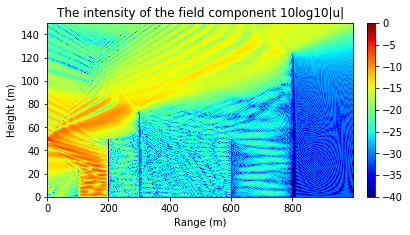

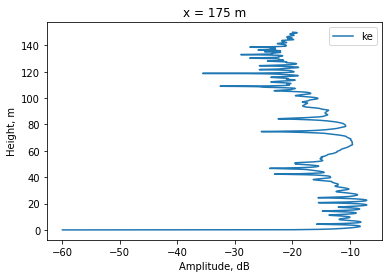

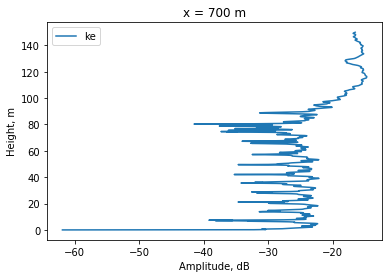

In [6]:
vis = FieldVisualiser(field, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), label='ke')
plt = vis.plot2d(min=-40, max=0)
plt.title('The intensity of the field component 10log10|u|')
plt.xlabel('Range (m)')
plt.ylabel('Height (m)')
plt.show()

plt = vis.plot_ver(175)
plt.title('x = 175 m')
plt.xlabel('Amplitude, dB')
plt.ylabel('Height, m')
plt.show()

plt = vis.plot_ver(700)
plt.title('x = 700 m')
plt.xlabel('Amplitude, dB')
plt.ylabel('Height, m')
plt.show()